# Shapley Values

## O que é?

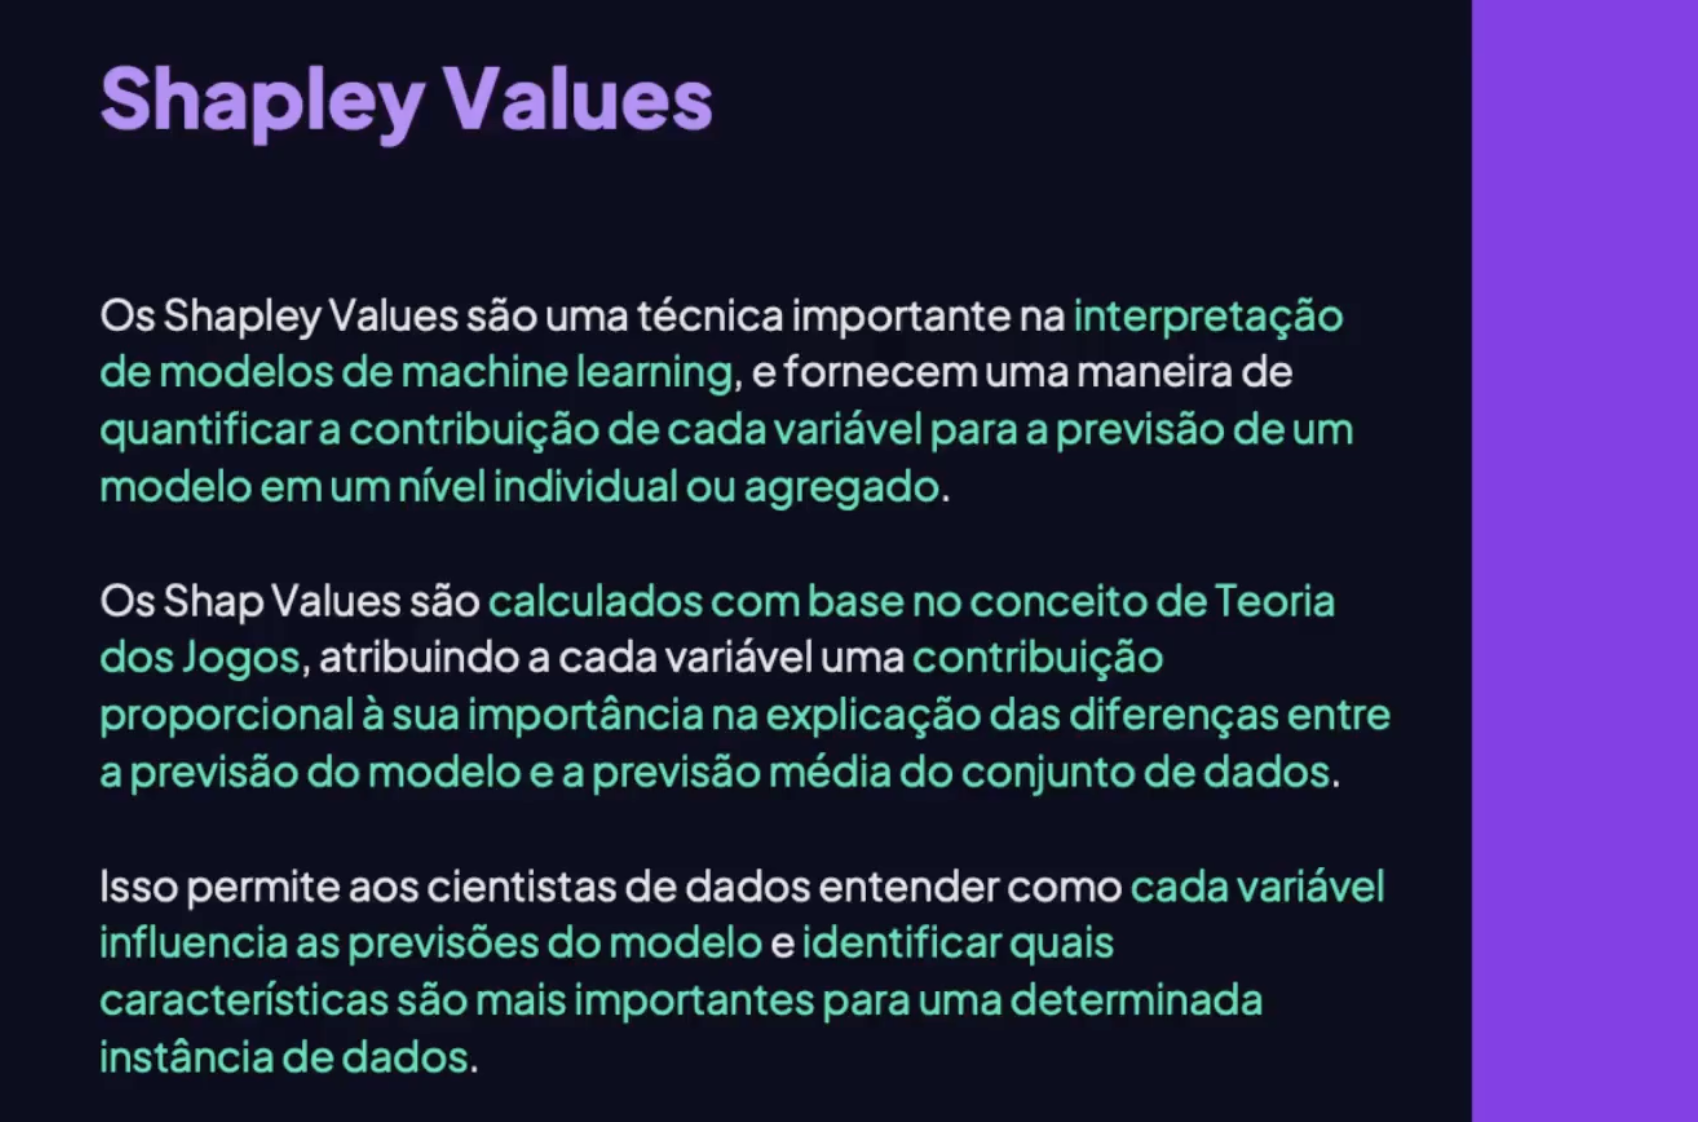

## Importações

In [20]:
import pandas as pd
import shap
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split

## Regressão

### Carregar os dados

In [32]:
df_colesterol = pd.read_csv('./dataset/colesterol.csv')

In [33]:
# Transformar variaveis categóricas em numéricas
df_colesterol.drop(columns=['Id'], axis=1, inplace=True)

df_colesterol = pd.get_dummies(df_colesterol, columns=['Grupo Sanguíneo', 'Fumante', 'Nível de Atividade'], dtype='int')

df_colesterol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Idade                        1000 non-null   int64  
 1   Peso                         1000 non-null   float64
 2   Altura                       1000 non-null   int64  
 3   Colesterol                   1000 non-null   float64
 4   Grupo Sanguíneo_A            1000 non-null   int64  
 5   Grupo Sanguíneo_AB           1000 non-null   int64  
 6   Grupo Sanguíneo_B            1000 non-null   int64  
 7   Grupo Sanguíneo_O            1000 non-null   int64  
 8   Fumante_Não                  1000 non-null   int64  
 9   Fumante_Sim                  1000 non-null   int64  
 10  Nível de Atividade_Alto      1000 non-null   int64  
 11  Nível de Atividade_Baixo     1000 non-null   int64  
 12  Nível de Atividade_Moderado  1000 non-null   int64  
dtypes: float64(2), int6

### Treinar o modelo

In [34]:
# Separar X e y
X = df_colesterol.drop(columns=['Colesterol'])
y = df_colesterol['Colesterol']

In [35]:
# Separar modelo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [36]:
model_reg = LinearRegression()
model_reg.fit(X_train, y_train)

LinearRegression()

### Apresentar plots Shapley Values - Regressão

In [37]:
# Rodar o explainer no conjunto de treino
explainer_reg = shap.Explainer(model_reg.predict, X_train)

In [38]:
# Calcular o Shapley values para o conjunto de teste
shap_values_reg = explainer_reg(X_test)

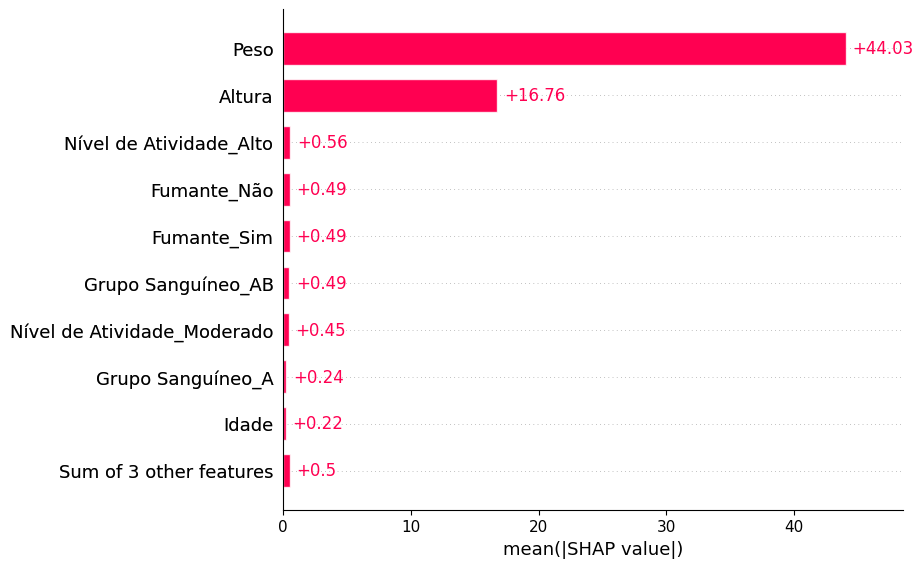

In [39]:
# Plotar a contribuição geral por Sharp Values
shap.plots.bar(shap_values_reg)

In [40]:
# Mostrar 1 instancia do conjunto de teste
X_test.iloc[0,:]

Idade                           29.0
Peso                            87.8
Altura                         179.0
Grupo Sanguíneo_A                0.0
Grupo Sanguíneo_AB               1.0
Grupo Sanguíneo_B                0.0
Grupo Sanguíneo_O                0.0
Fumante_Não                      1.0
Fumante_Sim                      0.0
Nível de Atividade_Alto          0.0
Nível de Atividade_Baixo         1.0
Nível de Atividade_Moderado      0.0
Name: 833, dtype: float64

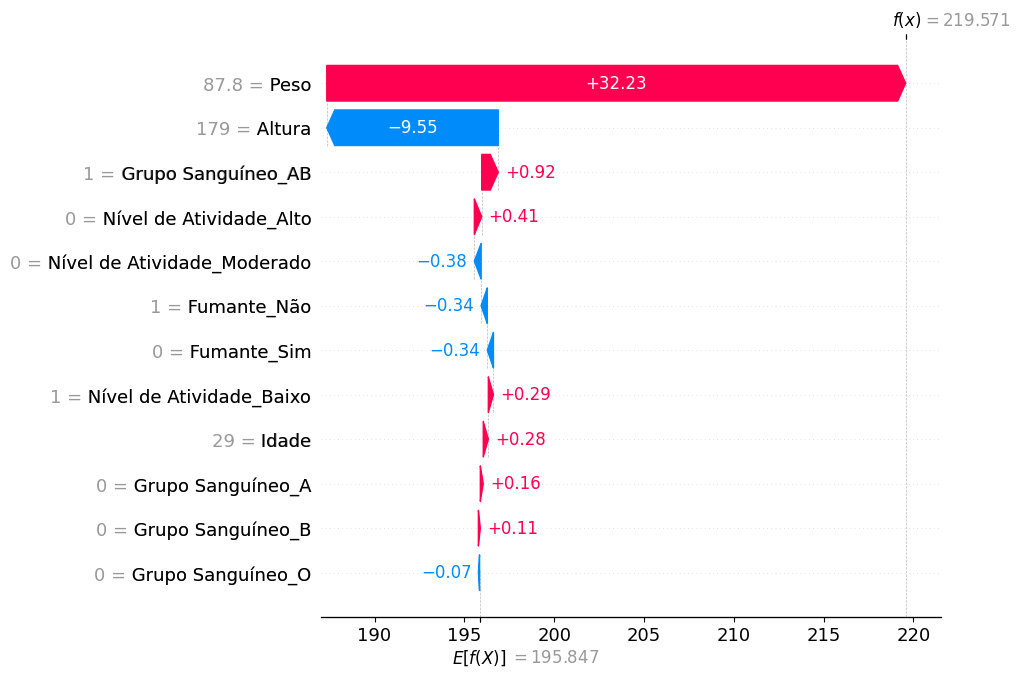

In [41]:
# Plotar os Shapley values para um exemplo específico
shap.plots.waterfall(shap_values_reg[0], max_display=13)

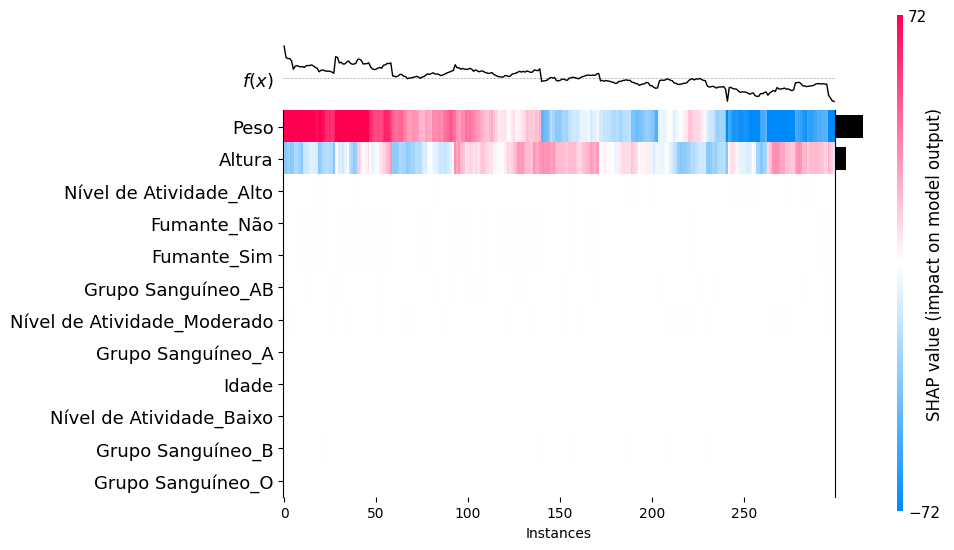

<Axes: xlabel='Instances'>

In [42]:
# Plotar os Shapley values Heatmap geral
shap.plots.heatmap(shap_values_reg, max_display=13)

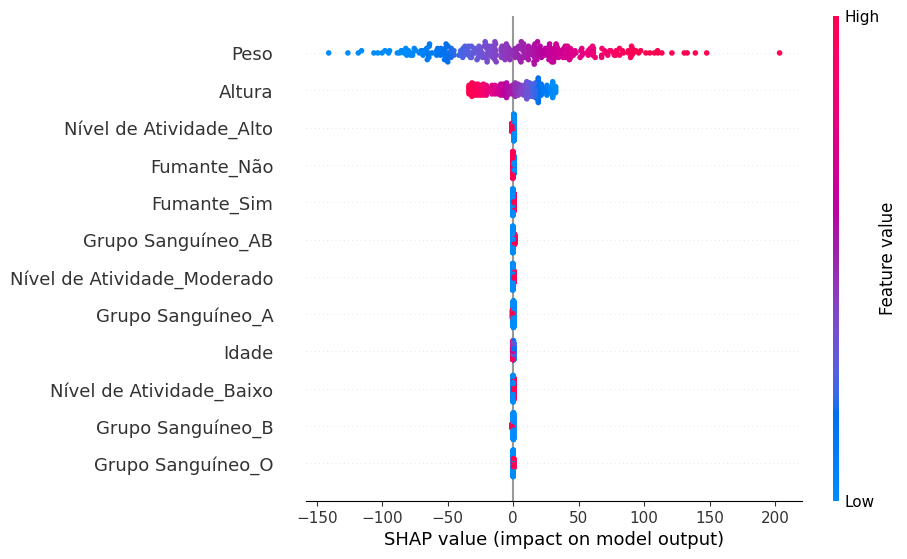

In [43]:
# Plotar os Shapley values Beeswarm geral
shap.plots.beeswarm(shap_values_reg, max_display=13)

## Classificação

### Carregar os dados

In [44]:
df_fruit_quality = pd.read_csv('./dataset/fruit_quality.csv')

In [45]:
df_fruit_quality.drop(columns=['A_id'], axis=1, inplace=True)
df_fruit_quality.Quality = (df_fruit_quality.Quality == 'good').astype(int)
df_fruit_quality

df_fruit_quality.head(5)

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590,1
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809,1
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636,0
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723,1
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984,1


### Treinar o modelo de regressão logistica

In [46]:
# Separar X e y
X = df_fruit_quality.drop(columns=['Quality'])
y = df_fruit_quality['Quality']

In [47]:
# Separar modelo entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=51)

In [48]:
model_lr = LogisticRegression()
model_lr.fit(X_train, y_train)

LogisticRegression()

### Apresentar plots Shapley Values - Classificação

In [49]:
# Rodar o explainer no conjunto de treino
explainer_class = shap.Explainer(model_lr.predict, X_train)

In [50]:
# Calcular o Shapley values para o conjunto de teste
shap_values_class = explainer_class(X_test)

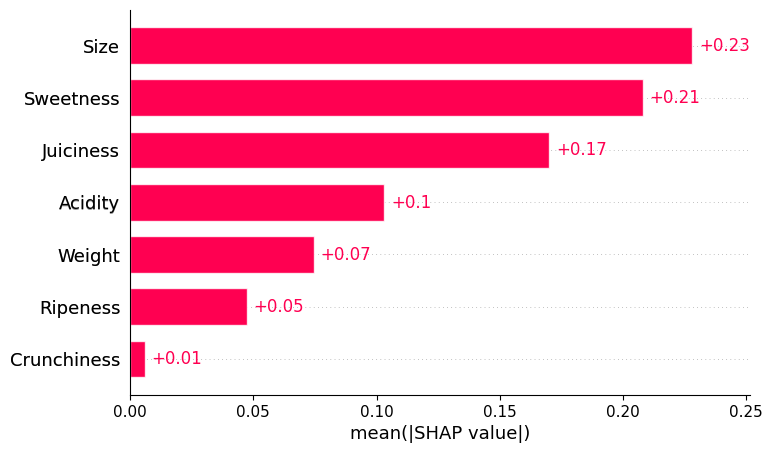

In [51]:
# Plotar a contribuição geral por Sharp Values
shap.plots.bar(shap_values_class)

In [52]:
# Mostrar 1 instancia do conjunto de teste
X_test.iloc[0,:]

Size           1.819744
Weight        -1.174086
Sweetness     -2.772288
Crunchiness   -0.039636
Juiciness     -1.437848
Ripeness       1.648811
Acidity       -1.098697
Name: 1150, dtype: float64

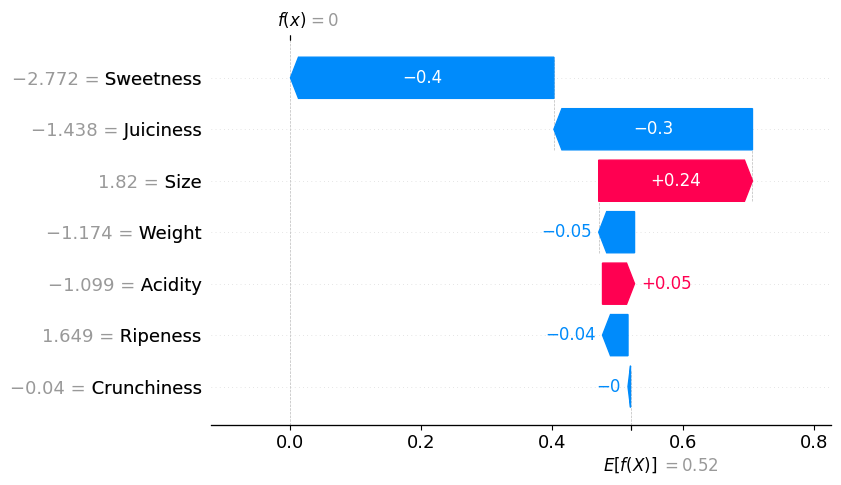

In [53]:
# Plotar os Shapley values para um exemplo específico
shap.plots.waterfall(shap_values_class[0], max_display=7)

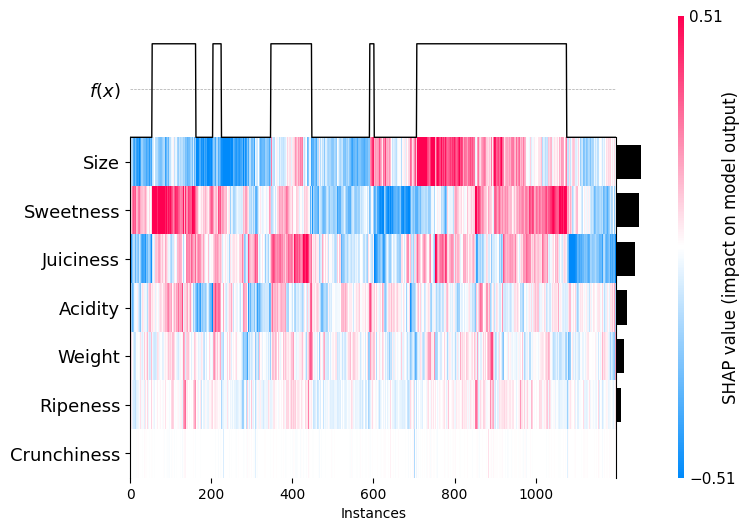

<Axes: xlabel='Instances'>

In [54]:
# Plotar os Shapley values Heatmap geral
shap.plots.heatmap(shap_values_class, max_display=13)

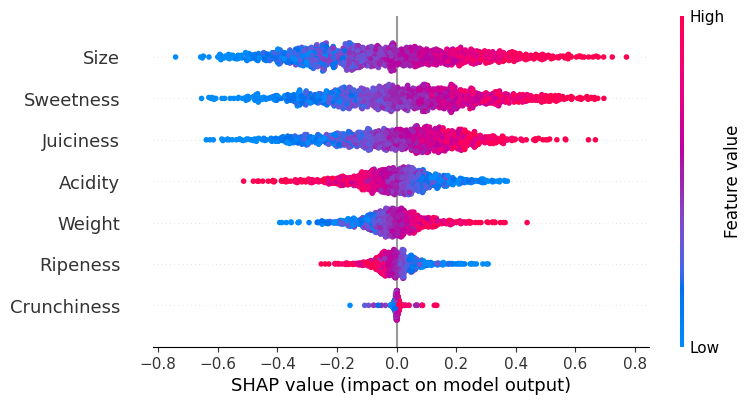

In [55]:
# Plotar os Shapley values Beeswarm geral
shap.plots.beeswarm(shap_values_class, max_display=13)